# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA AQUÍ TU RESPUESTA**

La ubicacion de la propiedad (zona, cercania a lugares de interes, cercania a los accesos de la ciudad, contaminacion), el tipo de propiedad , el tamaño de la propiedad, los metros cuadrados que abarca, los metros cuadrados del terreno, la cantidad de cuartos que posee, y el tipo de cuartos. Porque son todos factores que influyen en el precio de una propiedad.


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
pd.read_csv('Datos_Properati.csv')
data = pd.read_csv('Datos_properati.csv')
data.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
data.shape

(146660, 19)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
data.columns.tolist()

['start_date',
 'end_date',
 'created_on',
 'lat',
 'lon',
 'l1',
 'l2',
 'l3',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price',
 'currency',
 'title',
 'description',
 'property_type',
 'operation_type']

In [6]:
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [7]:
set(data.property_type)

{'Casa',
 'Casa de campo',
 'Cochera',
 'Departamento',
 'Depósito',
 'Local comercial',
 'Lote',
 'Oficina',
 'Otro',
 'PH'}

#### Aca se muestra la cantidad de instancias que hay por el tipo de propiedad.

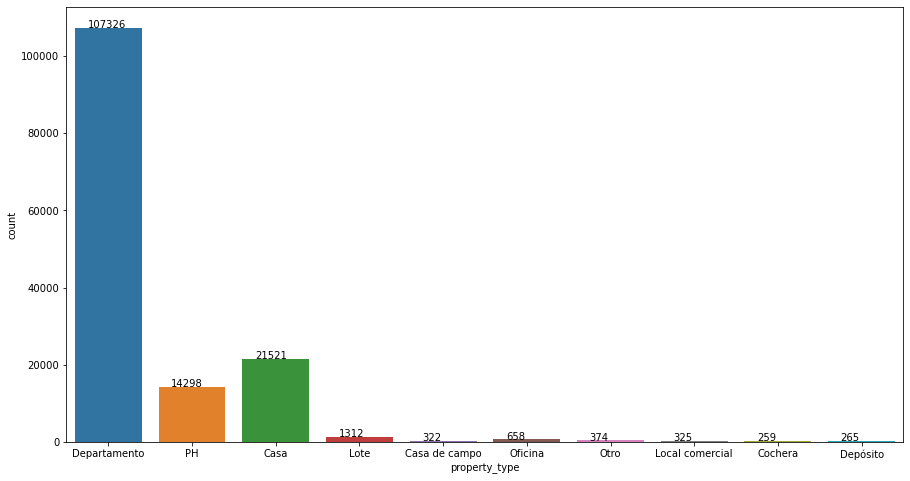

In [8]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data = data, x = "property_type")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

#### Se muestra un grafico de barras para las zonas y tambien se muestra la cantidad de instancias que tiene cada una.

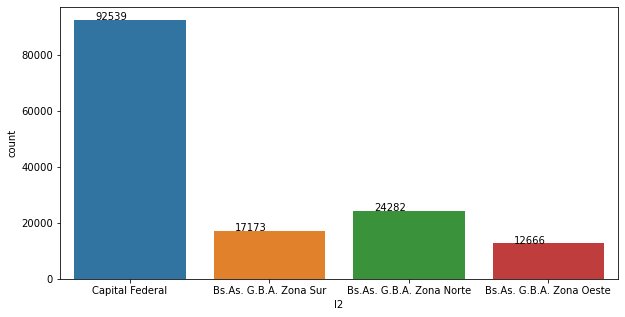

In [9]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = data, x = "l2")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

#### Vemos que la mayoria de las publicaciones son de Capital Federal

In [10]:
data.l3.describe()

count      146660
unique         89
top       Palermo
freq        13073
Name: l3, dtype: object

#### Se utiliza un scatterplot para mostrar a que zona pertenece cada barrio.

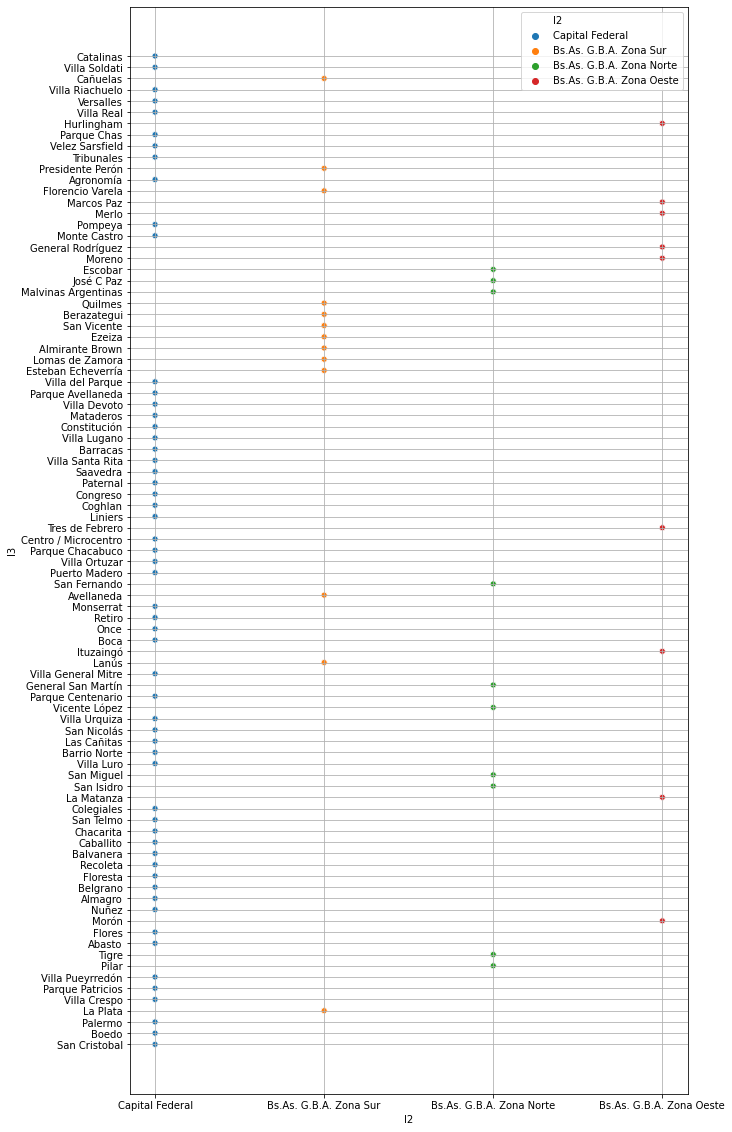

In [11]:
plt.figure(figsize=(10,20))
sns.scatterplot(x="l2", y="l3", hue="l2" , data=data)
plt.grid()

#### Grafico de barras para los barrios 

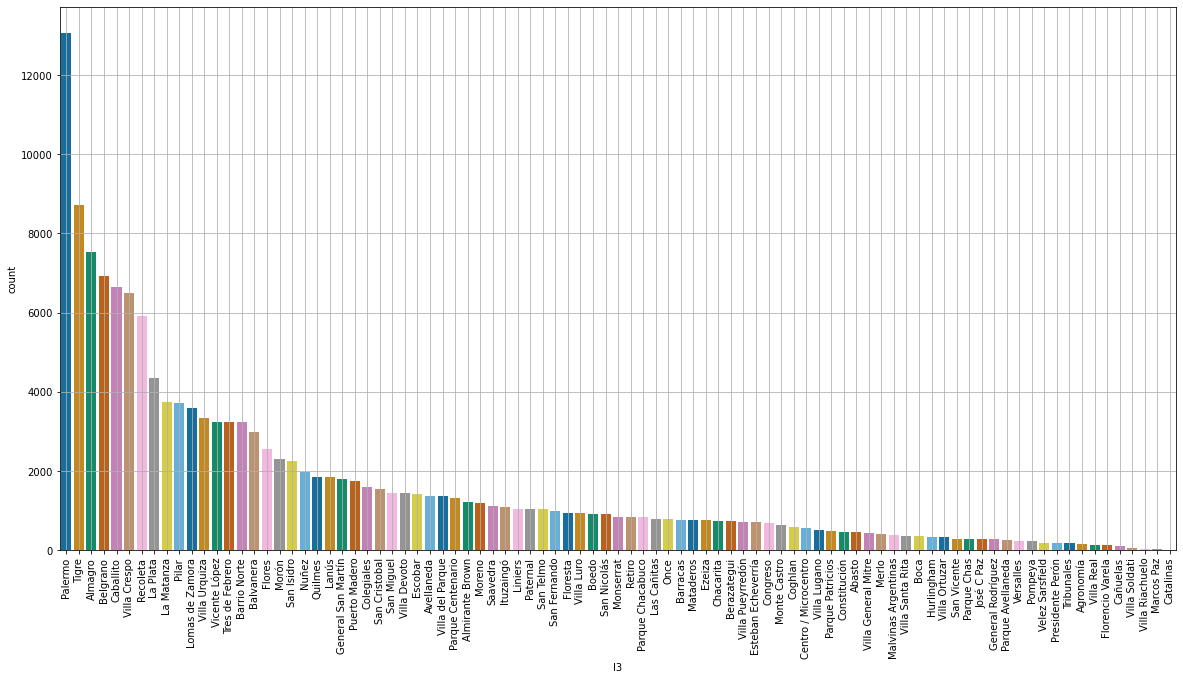

In [52]:
plt.figure(figsize = (20,10)) 
pal = sns.color_palette("colorblind")
ax=sns.countplot(data=data, x="l3", order = data['l3'].value_counts().index, palette = pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [16]:
mejor=data.copy()

In [17]:
tipos_propiedad=mejor.property_type.value_counts().index[:3].to_list()

In [18]:
mejor=mejor[(mejor.l2=='Capital Federal')&(mejor.property_type.isin(tipos_propiedad))]

In [19]:
mejor.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

#### Descripcion de mis variables numericas

In [20]:
mejor.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


#### Se rellenan las celdas que esten vacias en las columnas bathrooms, surface total y surface covered

In [21]:
mejor.bathrooms=mejor.bathrooms.fillna(value=0.0)
mejor.surface_total=mejor.surface_total.fillna(value=0.0)
mejor.surface_covered=mejor.surface_covered.fillna(value=0.0)

In [22]:
mejor.isna().sum()

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [23]:
mejor.shape

(91485, 19)

#### Se eliminan las filas en donde la superficie cubierta sea mayor a la total

In [24]:
mejor=mejor.drop(mejor[mejor['surface_covered'] > mejor['surface_total']].index)

In [25]:
mejor.reset_index(drop=True,inplace=True)

In [26]:
mejor.shape

(90526, 19)

#### Se arma una lista con las variables numericas

In [27]:
df = mejor
columnas = df.columns.tolist()
lista_numerica = []
lista_categorica = []
for x in range(0,len(df.columns))  :
    if df[columnas[x]].dtype == 'int64'or df[columnas[x]].dtype == 'float64':
        lista_numerica.append(columnas[x])
    else:
        lista_categorica.append(columnas[x])
     

#### Nos deshacemos de las variables Latitud y Longitud ya que no nos sirven para nuestro estudio

In [28]:
lista_numerica.remove('lat')
lista_numerica.remove('lon')


#### Realizamos un boxplot para las 6 variables numericas.

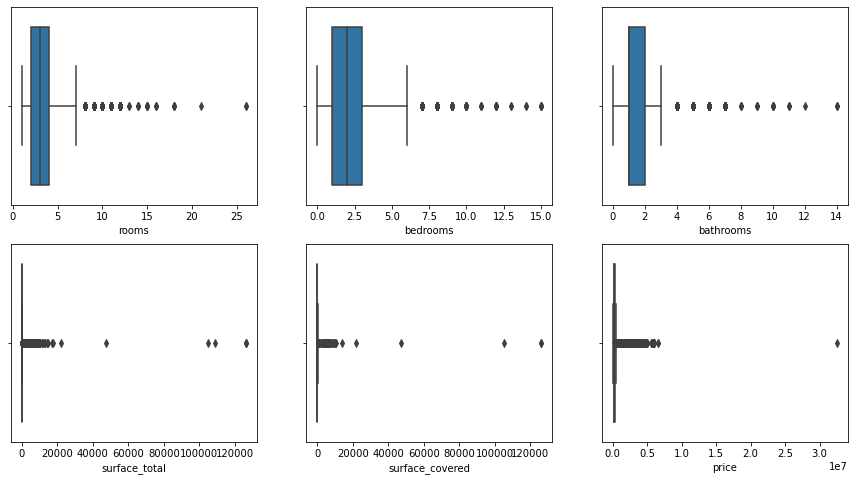

In [29]:
fig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(mejor[columns])


#### Limpieza de los outliers y nuevo boxplot cuando ya se limpian las variables.

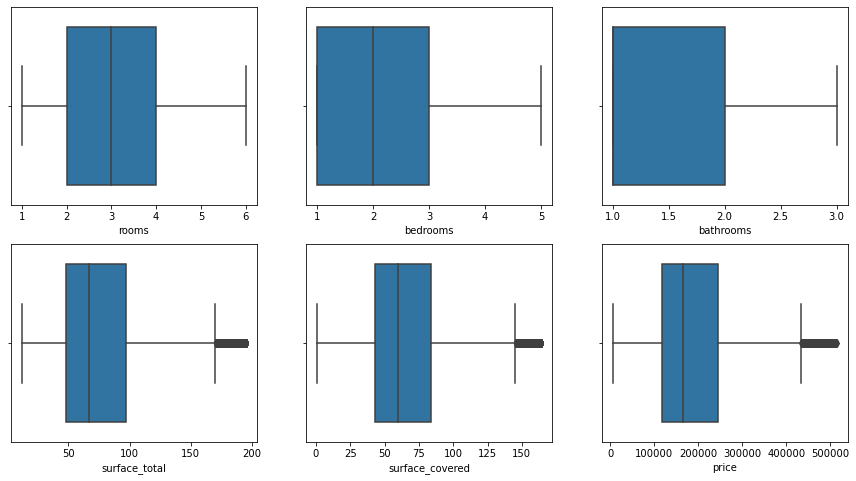

In [30]:
fig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    Q1 = mejor[columns].quantile(0.25)
    Q3 = mejor[columns].quantile(0.75)
    iqr = Q3 - Q1
    if Q1 - (1.5 * iqr)<0:
        IQMenor = 0.0
    else:
        IQMenor=Q1 - (1.5 * iqr)
    IQMayor = Q3 + (1.5 * iqr)
    limpio=mejor[(mejor[columns]>IQMenor) & (mejor[columns]<IQMayor)]
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(limpio[columns])

In [31]:
limpio.shape

(83029, 19)

In [32]:
limpio.reset_index(drop=True,inplace=True)

#### Pairplot

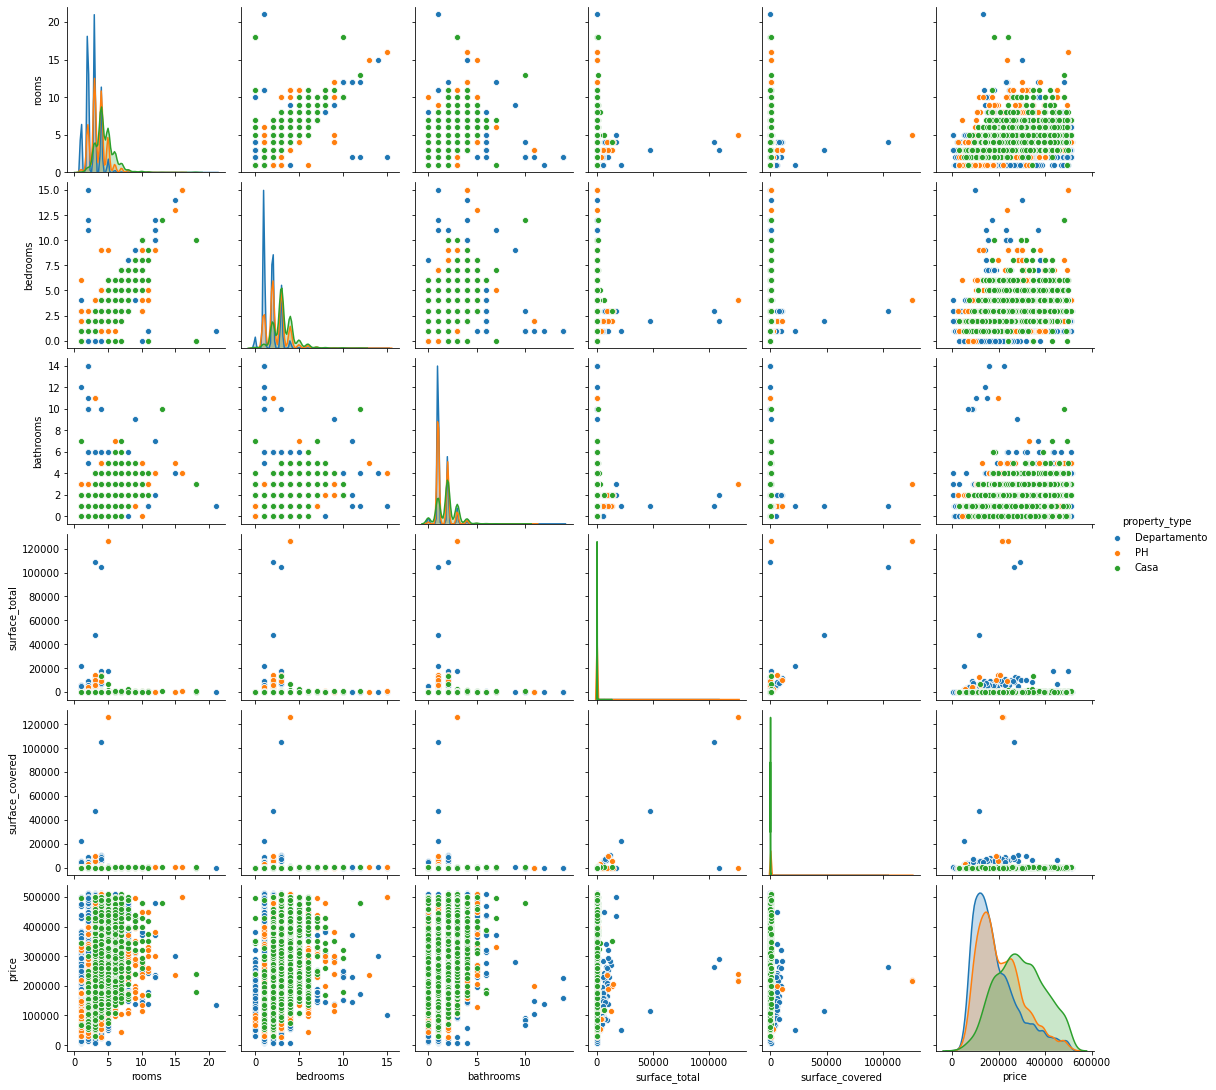

In [33]:
grafico=limpio.drop(columns=['lon','lat'])
sns.pairplot(grafico,hue='property_type')

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

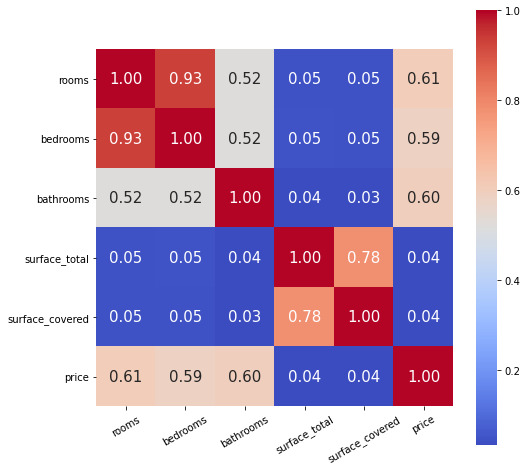

In [34]:
corr = grafico.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},   #annot_kws(tamaño de adentro)
           cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.show()

#### Por lo que vemos en el heat map, las mejores variables que tenemos para predecir el precio son los cuartos, baños y dormitorios

## Correlacion segun el tipo de propiedad

#### Departamentos

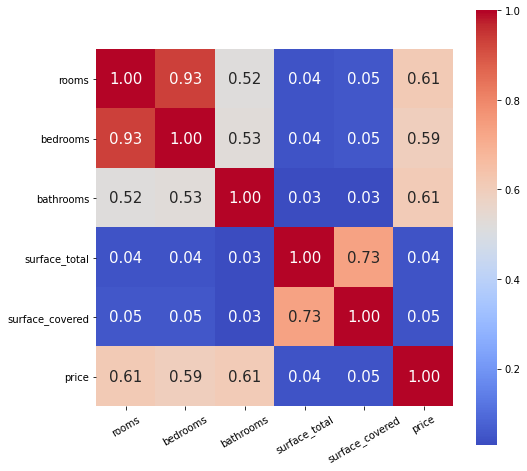

In [35]:
corr = grafico[grafico.property_type=='Departamento'].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},   #annot_kws(tamaño de adentro)
           cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.show()

#### Casa

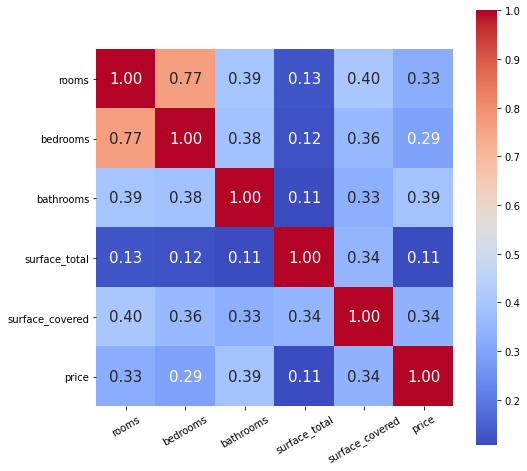

In [34]:
corr = grafico[grafico.property_type=='Casa'].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},   #annot_kws(tamaño de adentro)
           cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.show()

#### PH

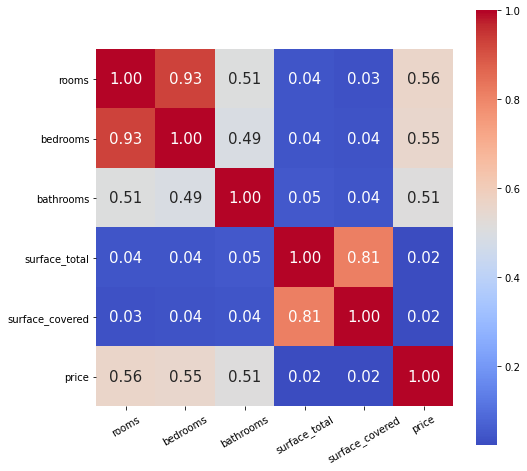

In [36]:
corr = grafico[grafico.property_type=='PH'].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},   #annot_kws(tamaño de adentro)
           cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.show()

### Vemos en los graficos que segun el tipo de propiedad que estamos usando para nuestro estudio las correlaciones de las variables para predecir los precios cambian. En el caso de los Departamentos y los PH las variables con mayor correlacion son los cuartos, los dormitorios y los baños. Pero en el caso de las casas vemos que las superficies cobran mucha mas importancia.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


# Comparacion de precios por zona utilizando la media.


In [37]:
zonas=data.groupby('l2').mean().sort_values('price',ascending=False)

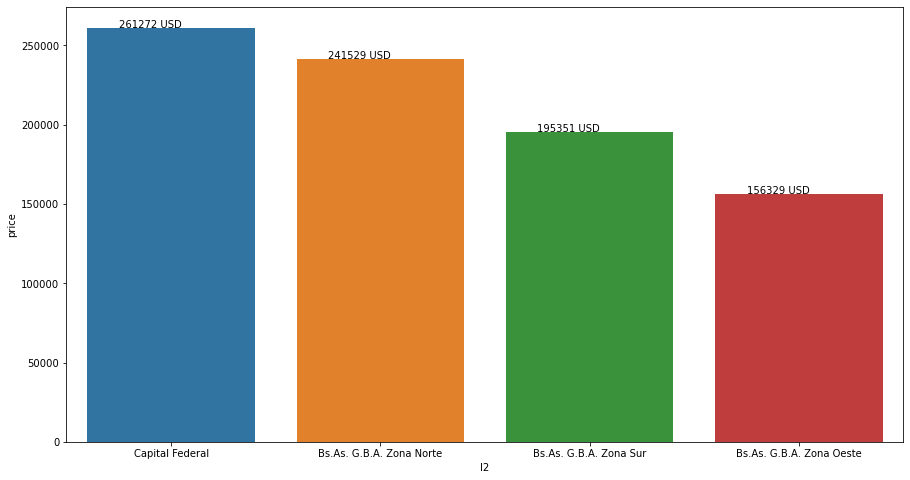

In [38]:
plt.figure(figsize=(15,8))
ax=sns.barplot(y='price',x=zonas.index,data=zonas)
for p in ax.patches:
    ax.annotate('{:.0f} USD'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

#### Es una respuesta muy general con respecto a las zonas ya que estamos utilizando el dataset sin estar filtrado ni trabajado.

# Comparacion de precios por barrio utilizando la media.

In [39]:
barrios=limpio.groupby('l3').mean().sort_values('price',ascending=False)

In [40]:
barrios.head(15)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
l3,,,,,,,,
Puerto Madero,-34.614352,-58.364285,2.130769,1.255769,1.536538,70.911538,65.428846,363578.155769
Las Cañitas,-34.569285,-58.434166,2.748634,1.792350,1.774135,74.265938,62.491803,273851.774135
Recoleta,-34.592507,-58.397031,2.918404,1.913969,1.501996,85.574945,76.507982,255066.388248
Belgrano,-34.562885,-58.454305,2.823999,1.856625,1.578032,90.986949,69.512597,244640.838137
Barrio Norte,-34.593221,-58.404010,2.984944,1.978291,1.489846,120.059874,110.387955,233891.255252
Nuñez,-34.548113,-58.464590,2.675199,1.740046,1.490899,85.284983,64.692833,228213.919226
Retiro,-34.595759,-58.378493,2.918519,1.878519,1.509630,120.986667,110.865185,226109.502222
Palermo,-34.586431,-58.423974,2.666185,1.721037,1.365534,76.255015,64.181005,225299.763871
Villa Devoto,-34.604164,-58.511538,3.045669,2.051969,1.432283,109.403937,76.317323,206304.711811


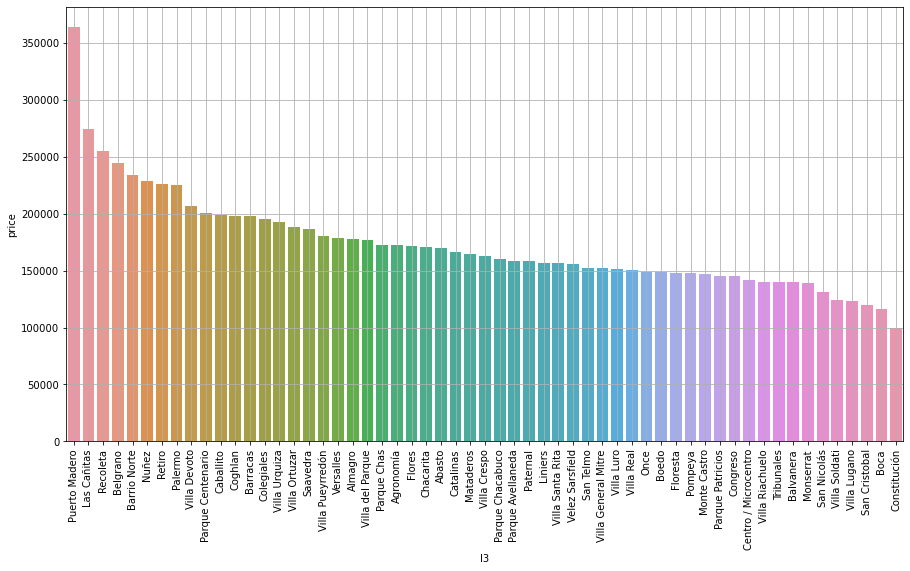

In [41]:
plt.figure(figsize=(15,8))
ax=sns.barplot(y='price',x=barrios.index,data=barrios)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()
plt.show()


#### Sigue siendo una respuesta muy general ya que aunque este dataset este filtrado y trabajado solo estamos teniendo en cuenta la zona de Capital Federal y 3 tipos de propiedad.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* 1)Elegir una métrica apropiada para evaluar los resultados de los modelos.
* 2)Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* 3)Realizar un Train/Test split de los datos.
* 4)Generar un modelo *benchmark* y evaluarlo.
*   Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
*   Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* 5)Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* 6)Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* 7)Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

# Limpieza del dataset

In [42]:
ultimo=data
tipos_propiedad=data.property_type.value_counts().index[:3].to_list()

In [43]:
#Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
ultimo=ultimo[(data.l2=='Capital Federal') & (data.property_type.isin(tipos_propiedad))]
ultimo.shape

(91485, 19)

In [44]:
# Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2, y precio menor a  4000000 dolares.
ultimo=ultimo[(ultimo.surface_total <=1000) & (ultimo.surface_total>=15) & (ultimo.price<=4000000)]
ultimo.shape

(82373, 19)

In [45]:
#Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
ultimo=ultimo.iloc[:,8:14]
ultimo.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [46]:
#Descarta aquellas instacias con valores faltantes.
ultimo=ultimo.dropna(axis=0)
ultimo.shape


(81019, 6)

In [47]:
ultimo.reset_index(drop=True,inplace=True)

# Modelos

In [40]:
#Funcion para dividir en categorias de precios
#ultimo['category'] = ultimo['price'].apply(lambda x: 1 if x<=125000 else (2 if x>125000 and x<= 180000 else (3 if x>180000 and x<=280000 else 4)) )

# 1) Elegir una métrica apropiada para evaluar los resultados de los modelos.

### Utilizaremos el error absoluto medio como la metrica principal para evaluar cada uno de los modelos pero tambien se van a incluir como referencia el puntaje de la varianza, el maximo error residual y la raiz del error cuadratico medio.

# 2) Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`).

In [48]:
X = ultimo.loc[:, ['rooms', 'bedrooms', 'bathrooms','surface_total','surface_covered']]

In [49]:
y = ultimo.loc[:, ['price']]

# 3) Realizar un Train/Test split de los datos.

In [50]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 4) Generar un modelo *benchmark* y evaluarlo.
   # Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
#   Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [137]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [138]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [139]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Modelo: Regresión lineal
El puntaje de la varianza sobre el set de entrenamiento: 0.5517887107017188
El puntaje de la varianza sobre el set de evaluacion: 0.5514909762094538

El maximo error residual sobre el set de entrenamiento: 3022081.2831013
El maximo error residual sobre el set de evaluacion: 3019317.52935407

El error absoluto medio sobre el set de entrenamiento: 96179.99029116215
El error absoluto medio sobre el set de evaluacion: 97191.4659662027

Raíz del error cuadrático medio sobre el set de entrenamiento: 199173.83253528475
Raíz del error cuadrático medio sobre el set de evaluacion: 202449.36540361567


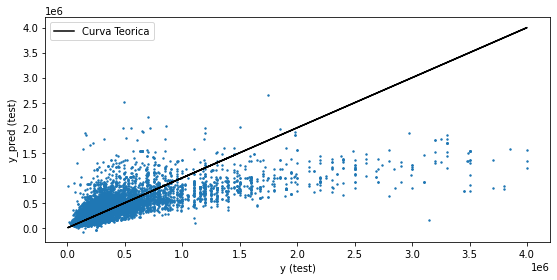

Modelo: Vecinos más cercanos
El puntaje de la varianza sobre el set de entrenamiento: 0.8337899513677605
El puntaje de la varianza sobre el set de evaluacion: 0.7369821041582663

El maximo error residual sobre el set de entrenamiento: 2942000.0
El maximo error residual sobre el set de evaluacion: 3044100.0

El error absoluto medio sobre el set de entrenamiento: 51593.16016786275
El error absoluto medio sobre el set de evaluacion: 61921.19480786637

Raíz del error cuadrático medio sobre el set de entrenamiento: 121300.24049431273
Raíz del error cuadrático medio sobre el set de evaluacion: 155040.1332898459


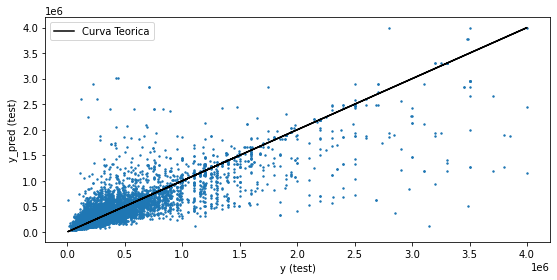

Modelo: Árbol de Decisión
El puntaje de la varianza sobre el set de entrenamiento: 0.5844333913686437
El puntaje de la varianza sobre el set de evaluacion: 0.5852183150195135

El maximo error residual sobre el set de entrenamiento: 3445187.385670732
El maximo error residual sobre el set de evaluacion: 3020981.6918528513

El error absoluto medio sobre el set de entrenamiento: 91548.36407240885
El error absoluto medio sobre el set de evaluacion: 92426.86608549287

Raíz del error cuadrático medio sobre el set de entrenamiento: 191783.485243933
Raíz del error cuadrático medio sobre el set de evaluacion: 194688.15091192327


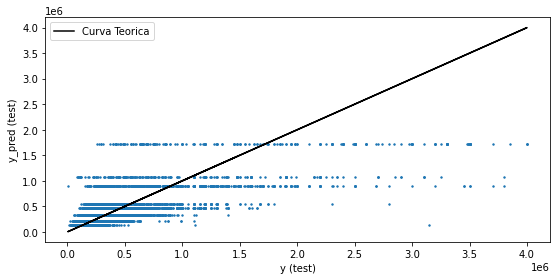

In [140]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
modelos = ['Regresión lineal', 'Vecinos más cercanos','Árbol de Decisión']

for i, model in enumerate([linear_model,  knn_regressor,tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
    
    train_acc = explained_variance_score(y_train, y_train_pred)
    test_acc = explained_variance_score(y_test, y_test_pred)
    print('El puntaje de la varianza sobre el set de entrenamiento:', train_acc)
    print('El puntaje de la varianza sobre el set de evaluacion:',test_acc)
    print()
    
    train_maxe = max_error(y_train, y_train_pred)
    test_maxe = max_error(y_test, y_test_pred)
    print('El maximo error residual sobre el set de entrenamiento:', train_maxe)
    print('El maximo error residual sobre el set de evaluacion:',test_maxe)
    print()
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
    print('El error absoluto medio sobre el set de evaluacion:',test_mae)
    print()

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
    print(f'Raíz del error cuadrático medio sobre el set de evaluacion: {rmse_test}')
    
    plt.figure(figsize = (15,4))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred,s=2)
    ax.plot(y, y, 'k-',label='Curva Teorica')
    
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 5) Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

## Vecinos

In [92]:
lista_accuracy_train = []
lista_accuracy_test = []

k_vecinos = np.arange(1,60)

for k in k_vecinos:   
   
    knn_regressor = KNeighborsRegressor(n_neighbors=k,weights='distance',p=1)
    
    knn_regressor.fit(X_train,y_train)
    
    y_train_pred = knn_regressor.predict(X_train)
    train_acc =  mean_absolute_error(y_train, y_train_pred)
    
    y_test_pred = knn_regressor.predict(X_test)
    test_acc =  mean_absolute_error(y_test, y_test_pred)
    
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Posicion en lista donde se encuentre el minimo valor:
52


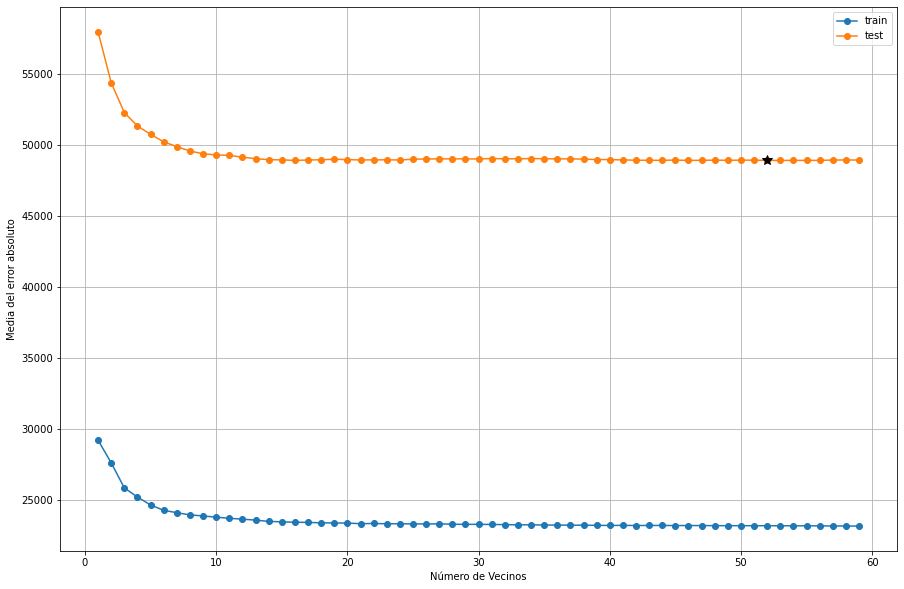

In [99]:
plt.figure(figsize = (15,10))
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.plot([lista_accuracy_test.index(min(lista_accuracy_test))],[min(lista_accuracy_test)], marker='*', markersize=10, color="black")
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Media del error absoluto')
plt.grid()
print('Posicion en lista donde se encuentre el minimo valor:')
print(lista_accuracy_test.index(min(lista_accuracy_test))) 

In [100]:
knn_regressor = KNeighborsRegressor(n_neighbors=52,weights='distance',p=1)
knn_regressor.fit(X_train, y_train)
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

El puntaje de la varianza sobre el set de entrenamiento: 0.9688807941988686
El puntaje de la varianza sobre el set de evaluacion: 0.8111997874732872

El maximo error residual sobre el set de entrenamiento: 2283333.333333333
El maximo error residual sobre el set de evaluacion: 3066900.0

El error absoluto medio sobre el set de entrenamiento: 23202.918471450892
El error absoluto medio sobre el set de evaluacion: 48919.17390534535

Raíz del error cuadrático medio sobre el set de entrenamiento: 52481.383595219035
Raíz del error cuadrático medio sobre el set de evaluacion: 131402.96361801508


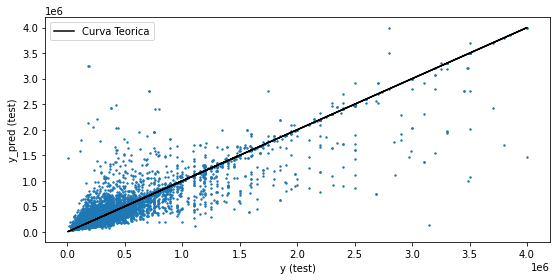

In [101]:
train_acc = explained_variance_score(y_train, y_train_pred)
test_acc = explained_variance_score(y_test, y_test_pred)
print('El puntaje de la varianza sobre el set de entrenamiento:', train_acc)
print('El puntaje de la varianza sobre el set de evaluacion:',test_acc)
print()
    
train_maxe = max_error(y_train, y_train_pred)
test_maxe = max_error(y_test, y_test_pred)
print('El maximo error residual sobre el set de entrenamiento:', train_maxe)
print('El maximo error residual sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'Raíz del error cuadrático medio sobre el set de evaluacion: {rmse_test}')

plt.figure(figsize = (15,4))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
ax.plot(y, y, 'k-',label='Curva Teorica')
    
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

## Arbol

In [102]:
lista_accuracy_train = []
lista_accuracy_test = []

max_depths = np.arange(1,50)

for max_depth in max_depths:

    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)

    clf.fit(X_train,y_train)

    y_train_pred = clf.predict(X_train)
    train_acc = mean_absolute_error(y_train, y_train_pred)

    y_test_pred = clf.predict(X_test)
    test_acc = mean_absolute_error(y_test, y_test_pred)

    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Posicion en lista donde se encuentre el minimo valor:
23


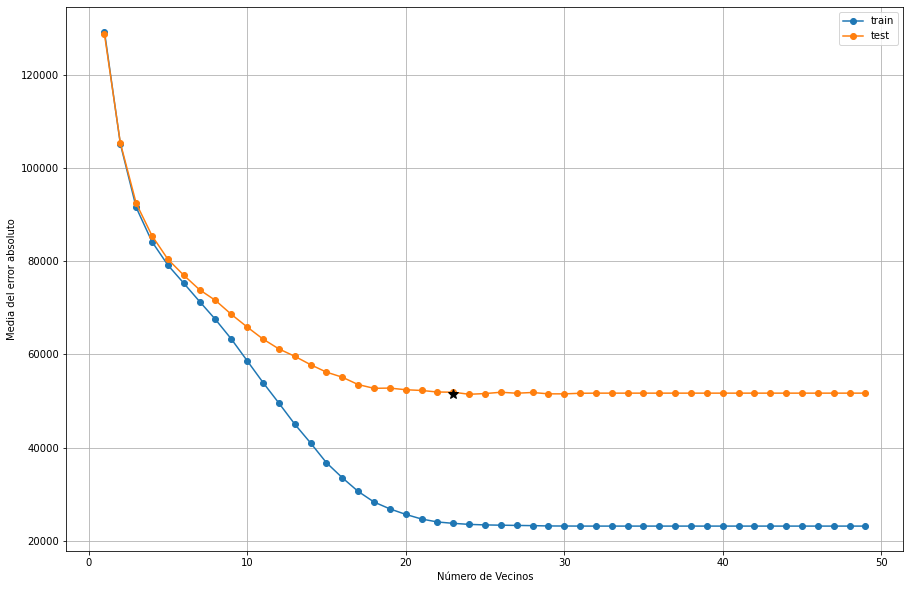

In [103]:
plt.figure(figsize = (15,10))
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.plot([lista_accuracy_test.index(min(lista_accuracy_test))],[min(lista_accuracy_test)], marker='*', markersize=10, color="black")
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Media del error absoluto')
plt.grid()
print('Posicion en lista donde se encuentre el minimo valor:')
print(lista_accuracy_test.index(min(lista_accuracy_test))) #Posicion 23 es max_depths=23

In [104]:
lista_accuracy_train = []
lista_accuracy_test = []

random_state = np.arange(0,400)

for random_state in random_state:

    clf = DecisionTreeRegressor(max_depth = 23, random_state=random_state)

    clf.fit(X_train,y_train)

    y_train_pred = clf.predict(X_train)
    train_acc = mean_absolute_error(y_train, y_train_pred)

    y_test_pred = clf.predict(X_test)
    test_acc = mean_absolute_error(y_test, y_test_pred)

    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

In [105]:
print(lista_accuracy_test.index(min(lista_accuracy_test)))

362


El puntaje de la varianza sobre el set de entrenamiento: 0.9677981207550042
El puntaje de la varianza sobre el set de evaluacion: 0.7640722117258372

El maximo error residual sobre el set de entrenamiento: 2283333.333333333
El maximo error residual sobre el set de evaluacion: 3075000.0

El error absoluto medio sobre el set de entrenamiento: 23729.28230188677
El error absoluto medio sobre el set de evaluacion: 51106.26096635346

Raíz del error cuadrático medio sobre el set de entrenamiento: 53386.50536064854
Raíz del error cuadrático medio sobre el set de evaluacion: 146840.7258538424


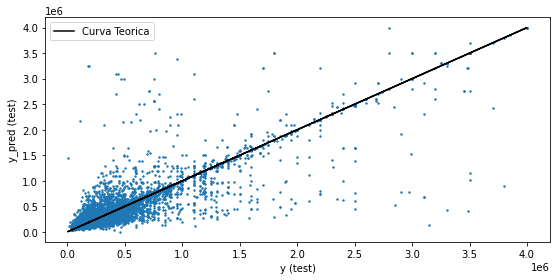

In [106]:
tree_regressor = DecisionTreeRegressor(max_depth=23, random_state=362)
tree_regressor.fit(X_train, y_train)
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)
train_acc = explained_variance_score(y_train, y_train_pred)
test_acc = explained_variance_score(y_test, y_test_pred)
print('El puntaje de la varianza sobre el set de entrenamiento:', train_acc)
print('El puntaje de la varianza sobre el set de evaluacion:',test_acc)
print()
    
train_maxe = max_error(y_train, y_train_pred)
test_maxe = max_error(y_test, y_test_pred)
print('El maximo error residual sobre el set de entrenamiento:', train_maxe)
print('El maximo error residual sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'Raíz del error cuadrático medio sobre el set de evaluacion: {rmse_test}')

plt.figure(figsize = (15,4))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred,s=2)
ax.plot(y, y, 'k-',label='Curva Teorica')
    
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

# 6) Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 

### Luego de optimizar los modelos de arbol de decision y de vecinos mas cercanos llegamos a la conclusion de que utilizaremos el modelo de vecinos mas cercanos ya que la metrica que estamos utilizando para evaluarlos (error absoluto medio), en el modelo de vecinos mas cercanos, es menor. Entonces esto quiere decir que vecinos mas cercos es mas exacto para predecir los precios que el arbol de decision.

# 7) Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

### Estamos dejando muchas variables fuera de nuestro estudio, el tipo de propiedad, las zonas y los barrios pueden ser de mucha ayuda para predecir los precios y se deberian tener en cuenta. En mi opinion podriamos dejar de lado la superficie total y trabajar solo con la superficie cubierta. La metodologia utilizada deja mucho que desear ya que se podria optimizar mucho mas si filtramos adecuadamente nuestras variables y tenemos en cuenta mas informacion.

# Teniendo en cuenta el tipo de propiedad, zonas y barrios.

In [107]:
nuevo=data.copy()

In [108]:
nuevo.shape

(146660, 19)

In [110]:
nuevo=nuevo.iloc[:,6:18]

In [111]:
nuevo=nuevo.drop(['currency','title','description'],axis=1)

In [112]:
nuevo.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


In [113]:
nuevo=nuevo.drop(nuevo[nuevo['surface_covered'] > nuevo['surface_total']].index)

In [114]:
nuevo=nuevo.dropna(axis=0)

In [115]:
nuevo.shape

(121401, 9)

In [133]:
lista_numerica

['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

In [116]:
def limpiar_dataframe(dataframe, columna):
    q25 = dataframe[columna].quantile(0.25)
    q75 = dataframe[columna].quantile(0.75)
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [117]:
for i in lista_numerica:
    nuevo=limpiar_dataframe(nuevo,i)

In [118]:
nuevo.reset_index(drop=True,inplace=True)

In [119]:
nuevo.shape

(94343, 9)

In [120]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [121]:
le.fit(nuevo['property_type'])
nuevo['property_number'] = le.transform(nuevo['property_type'])

In [122]:
le.fit(nuevo['l2'])
nuevo['l2_zone'] = le.transform(nuevo['l2'])

In [123]:
le.fit(nuevo['l3'])
nuevo['l3_barrio'] = le.transform(nuevo['l3'])

In [124]:
nuevo.drop(['property_type','l2','l3'],axis=1)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_number,l2_zone,l3_barrio
0,2.0,1.0,2.0,70.0,58.0,159000.0,9,3,11
1,2.0,1.0,1.0,45.0,45.0,125000.0,9,3,48
2,2.0,1.0,1.0,85.0,50.0,295000.0,9,3,48
3,2.0,1.0,1.0,50.0,35.0,40000.0,9,2,33
4,2.0,1.0,1.0,56.0,56.0,150000.0,9,3,76
...,...,...,...,...,...,...,...,...,...
94338,2.0,1.0,1.0,54.0,48.0,165000.0,3,2,9
94339,4.0,3.0,2.0,164.0,90.0,130000.0,3,0,55
94340,1.0,1.0,1.0,50.0,35.0,73000.0,3,0,55
94341,2.0,1.0,1.0,38.0,38.0,68000.0,3,0,55


In [125]:
X = nuevo.loc[:, ['rooms', 'bedrooms', 'bathrooms','surface_total','surface_covered','property_number','l2_zone','l3_barrio']]
y = nuevo.loc[:, ['price']]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [127]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [128]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [129]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Modelo: Regresión lineal
El puntaje de la varianza sobre el set de entrenamiento: 0.5111161144867042
El puntaje de la varianza sobre el set de evaluacion: 0.5089480878657096

El maximo error residual sobre el set de entrenamiento: 309308.1309044941
El maximo error residual sobre el set de evaluacion: 319308.1309044941

El error absoluto medio sobre el set de entrenamiento: 42507.77584847245
El error absoluto medio sobre el set de evaluacion: 42917.99900409071

Raíz del error cuadrático medio sobre el set de entrenamiento: 56051.37913621967
Raíz del error cuadrático medio sobre el set de evaluacion: 56401.52818299795


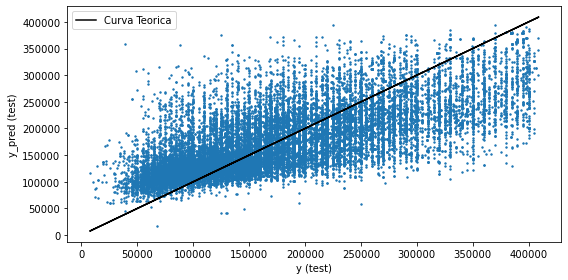

Modelo: Vecinos más cercanos
El puntaje de la varianza sobre el set de entrenamiento: 0.8338242736853136
El puntaje de la varianza sobre el set de evaluacion: 0.7368598301978622

El maximo error residual sobre el set de entrenamiento: 259000.0
El maximo error residual sobre el set de evaluacion: 282700.0

El error absoluto medio sobre el set de entrenamiento: 20727.288861296187
El error absoluto medio sobre el set de evaluacion: 26256.7303254072

Raíz del error cuadrático medio sobre el set de entrenamiento: 32707.737255585165
Raíz del error cuadrático medio sobre el set de evaluacion: 41328.5909819371


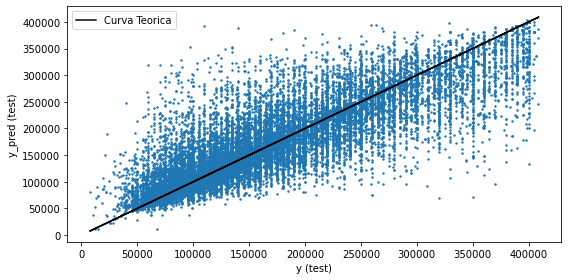

Modelo: Árbol de Decisión
El puntaje de la varianza sobre el set de entrenamiento: 0.5114862327146482
El puntaje de la varianza sobre el set de evaluacion: 0.5121838945881831

El maximo error residual sobre el set de entrenamiento: 263986.09566662053
El maximo error residual sobre el set de evaluacion: 248500.58137369034

El error absoluto medio sobre el set de entrenamiento: 41964.04976011018
El error absoluto medio sobre el set de evaluacion: 42266.64392969317

Raíz del error cuadrático medio sobre el set de entrenamiento: 56030.1577729422
Raíz del error cuadrático medio sobre el set de evaluacion: 56214.263457730456


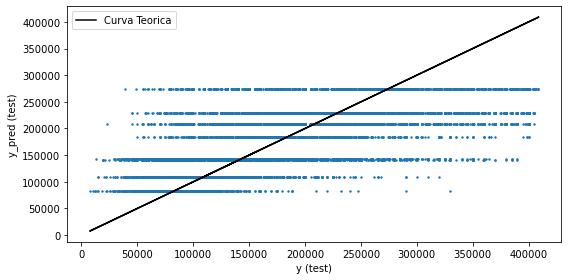

In [130]:
modelos = ['Regresión lineal', 'Vecinos más cercanos','Árbol de Decisión']

for i, model in enumerate([linear_model,  knn_regressor,tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    
    train_acc = explained_variance_score(y_train, y_train_pred)
    test_acc = explained_variance_score(y_test, y_test_pred)
    print('El puntaje de la varianza sobre el set de entrenamiento:', train_acc)
    print('El puntaje de la varianza sobre el set de evaluacion:',test_acc)
    print()
    
    train_maxe = max_error(y_train, y_train_pred)
    test_maxe = max_error(y_test, y_test_pred)
    print('El maximo error residual sobre el set de entrenamiento:', train_maxe)
    print('El maximo error residual sobre el set de evaluacion:',test_maxe)
    print()
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
    print('El error absoluto medio sobre el set de evaluacion:',test_mae)
    print()

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
    print(f'Raíz del error cuadrático medio sobre el set de evaluacion: {rmse_test}')
    
    plt.figure(figsize = (15,4))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    ax.plot(y, y, 'k-',label='Curva Teorica')
    
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [131]:
lista_accuracy_train = []
lista_accuracy_test = []

k_vecinos = np.arange(1,60)

for k in k_vecinos:   
   
    knn_regressor = KNeighborsRegressor(n_neighbors=k,weights='distance',p=1)
    
    knn_regressor.fit(X_train,y_train)
    
    y_train_pred = knn_regressor.predict(X_train)
    train_acc =  mean_absolute_error(y_train, y_train_pred)
    
    y_test_pred = knn_regressor.predict(X_test)
    test_acc =  mean_absolute_error(y_test, y_test_pred)
    
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Posicion en lista donde se encuentre el minimo valor:
7


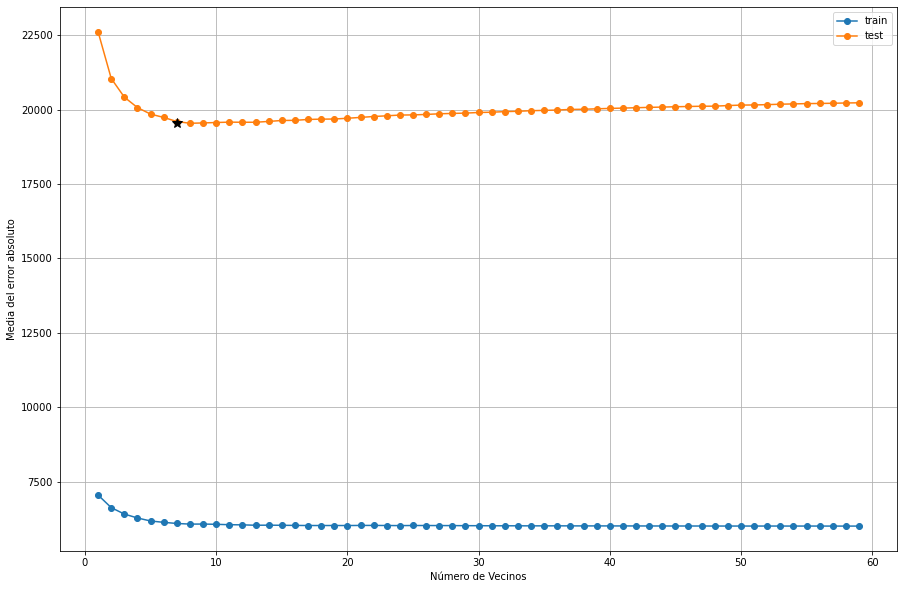

In [132]:
plt.figure(figsize = (15,10))
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.plot([lista_accuracy_test.index(min(lista_accuracy_test))],[min(lista_accuracy_test)], marker='*', markersize=10, color="black")
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Media del error absoluto')
plt.grid()
print('Posicion en lista donde se encuentre el minimo valor:')
print(lista_accuracy_test.index(min(lista_accuracy_test))) 

In [163]:
knn_regressor = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
knn_regressor.fit(X_train, y_train)
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

El puntaje de la varianza sobre el set de entrenamiento: 0.9704936531665733
El puntaje de la varianza sobre el set de evaluacion: 0.8183127791765732

El maximo error residual sobre el set de entrenamiento: 239000.0
El maximo error residual sobre el set de evaluacion: 286967.213114754

El error absoluto medio sobre el set de entrenamiento: 6097.30108137925
El error absoluto medio sobre el set de evaluacion: 19596.957615527677

Raíz del error cuadrático medio sobre el set de entrenamiento: 13770.239437143262
Raíz del error cuadrático medio sobre el set de evaluacion: 34343.80953497479


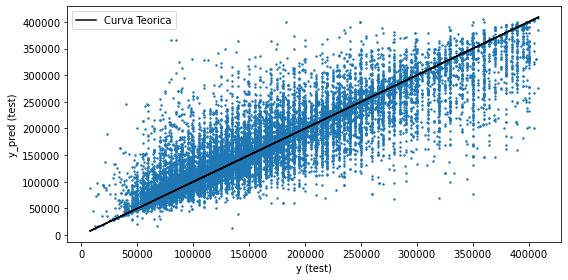

In [164]:
train_acc = explained_variance_score(y_train, y_train_pred)
test_acc = explained_variance_score(y_test, y_test_pred)
print('El puntaje de la varianza sobre el set de entrenamiento:', train_acc)
print('El puntaje de la varianza sobre el set de evaluacion:',test_acc)
print()
    
train_maxe = max_error(y_train, y_train_pred)
test_maxe = max_error(y_test, y_test_pred)
print('El maximo error residual sobre el set de entrenamiento:', train_maxe)
print('El maximo error residual sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'Raíz del error cuadrático medio sobre el set de evaluacion: {rmse_test}')

plt.figure(figsize = (15,4))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
ax.plot(y, y, 'k-',label='Curva Teorica')
    
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

### Aca podemos ver que el modelo entrenandolo con los tipos de propiedad, l2 y l3, y filtrandolo adecuadamente, es mucho mas exacto que el anterior ya que nuestro error absoluto medio bajo muchisimo. Y si vemos la distribucion de datos esta mucho mejor distribuida que en los modelos anteriores.